# Machine Learning Basic

Pada bagian ini kita akan mencoba latihan sederhana berkaitan tentang membuat pemodelan prediksi dengan machine learning. Kita akan menggunakan dataset dari UCI Machine Learnig.

[Dataset iris](https://archive.ics.uci.edu/dataset/53/iris)

# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split


#model ML
from sklearn.tree import DecisionTreeClassifier

#evaluasi
from sklearn.metrics import accuracy_score, classification_report

# Data Loading

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=columns)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# EDA (Exploratory Data Analysis)

In [ ]:
print("Summary statistics:")
display(iris.describe(include='number'))

Summary statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
display(iris.describe(include='object'))

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [ ]:
print("Class distribution:")
display(iris['class'].value_counts())

Class distribution:


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

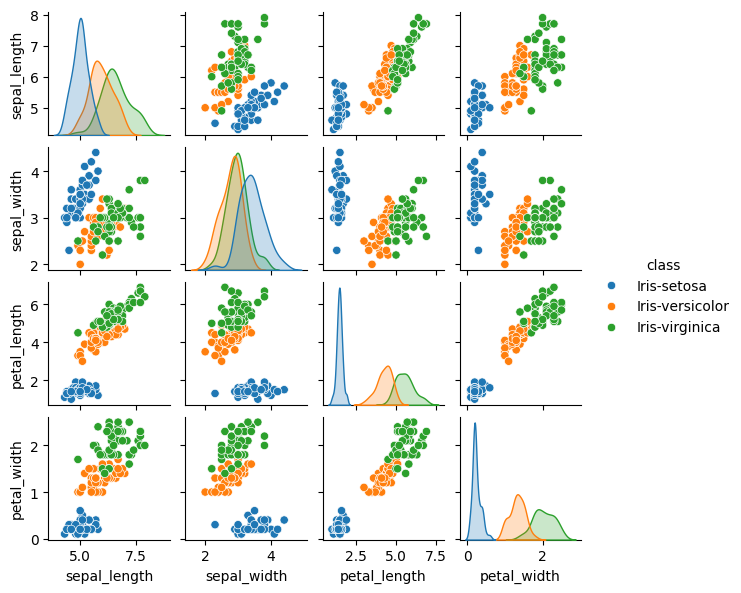

In [ ]:
sns.pairplot(iris, hue='class',height=1.5)
# plt.title("Pairplot of Iris Dataset")
plt.show()

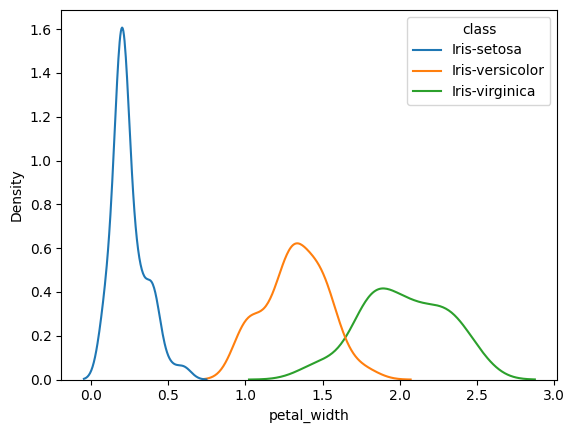

In [ ]:
sns.kdeplot(iris,x='petal_width', hue='class');

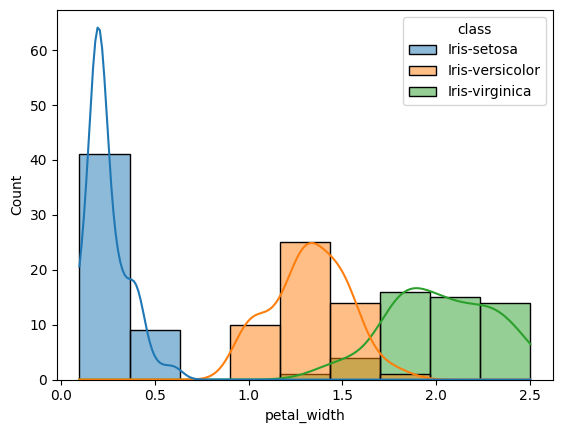

In [ ]:
sns.histplot(iris,x='petal_width', hue='class', kde=True);

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [ ]:
sns.scatterplot?

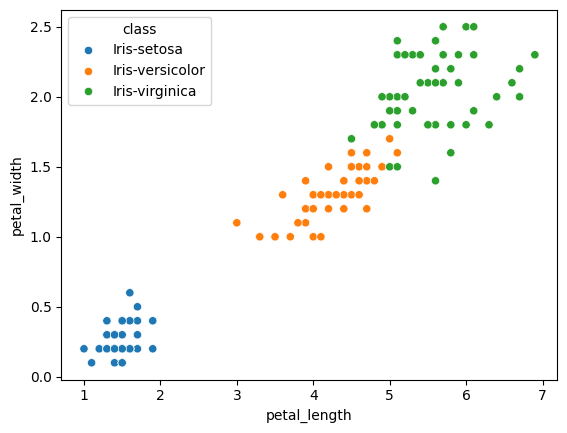

In [ ]:
sns.scatterplot(iris,x='petal_length',y='petal_width', hue='class');

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Keterangan:
- Nilai petal width akan cenderung naik ketika petal lengthnya pun naik.

In [ ]:
iris_setosa = iris.query("`class` == 'Iris-setosa'")
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris[iris['class']=='Iris-setosa']

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


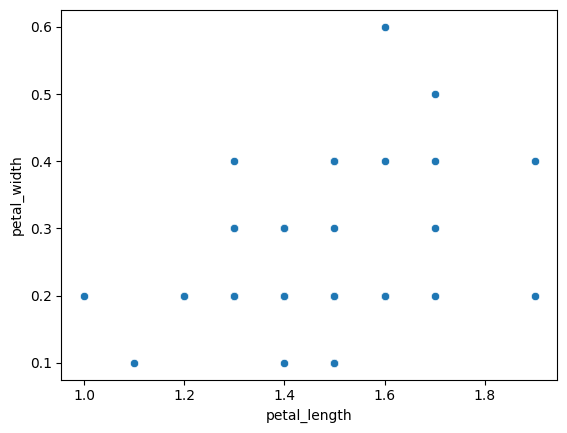

In [ ]:
sns.scatterplot(iris[iris['class']=='Iris-setosa'],x='petal_length',y='petal_width');

In [ ]:
iris.corr()

<ipython-input-19-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Data Preprocessing

In [ ]:
X = iris.drop('class', axis=1)
y = iris['class']

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(105, 4)

# Modeling

In [ ]:
# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [ ]:
# Classification Report
print("Classification Report data train:")
print(classification_report(y_train, y_pred_train))

Classification Report data train:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [ ]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, predictions))

Classification Repor data test:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5


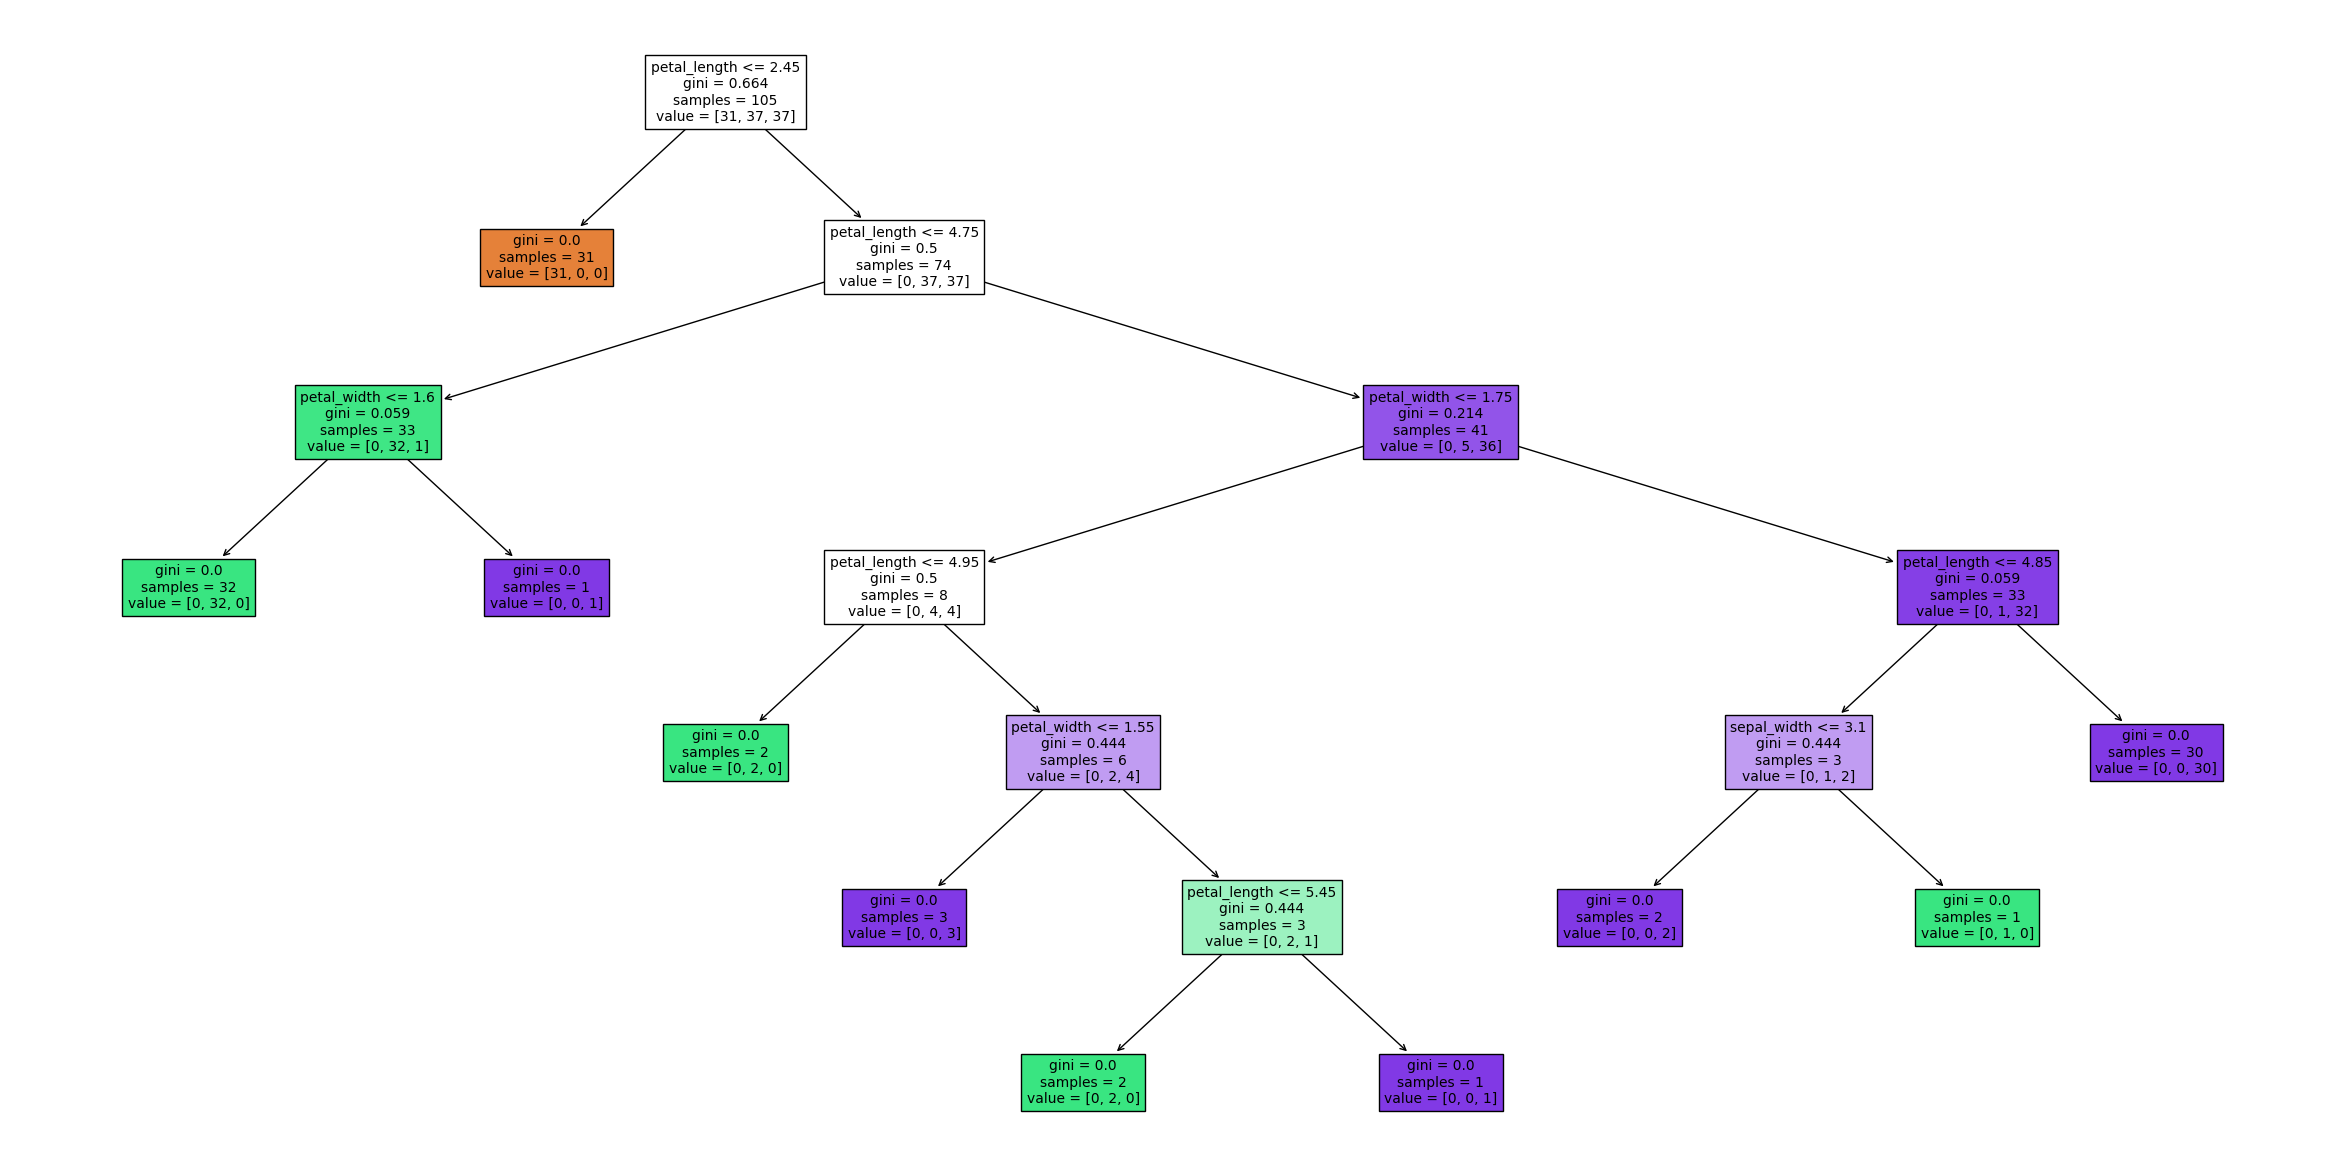

In [ ]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(model, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [ ]:
max_depth_model_dt= model.tree_.max_depth
max_depth_model_dt

6